# **Assignment 1**
## Yingjie Chen (yc24966) - 08:30 section
## Andrew Han (ah49372) - 10:30 section
## Sitong Li (sl43736) - 10:30 section
## Matthew Ruffner (mar9632) - 08:30 section
## Xinmeng Song (xs3659) - 08:30 section

**Our team scraped data from https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0**  
**This is a post that talks about midsize Sedans for different brands.**   
**Our team scripted 5000 comments/posts and conducted a text analysis based on the results.**  

In [ ]:
import pandas as pd

In [ ]:
!pip install selenium
from selenium import webdriver
!apt-get -q update # to update ubuntu to correctly run apt install
!apt install -yq chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 4.2MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.

In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

#Task A:

In [ ]:
# Feel free to run any cell except these two below (takes 20 min)

In [ ]:
wd = webdriver.Chrome('chromedriver', options=chrome_options)
total_comments = pd.DataFrame(columns = ['Date','user_id','comments']) 

for y in range(100):
  web_address = "https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0/p" + str(y)
  wd.get(web_address)
  # print(web_address)

  comments = pd.DataFrame(columns = ['Date','user_id','comments']) 
  ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")
  comment_ids = []
  for i in ids:
    comment_ids.append(i.get_attribute('id'))

  for x in comment_ids:
    #Extract dates from for each user on a page
    user_date = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
    date = user_date.get_attribute('title')

    #Extract user ids from each user on a page
    userid_element = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
    userid = userid_element.text

    #Extract Message for each user on a page
    user_message = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
    comment = user_message.text
                                   
    #Adding date, userid and comment for each user in a dataframe    
    comments.loc[len(comments)] = [date,userid,comment]
    
  total_comments = total_comments.append(comments, ignore_index=True)
    # print(comments)

total_comments

,Date,user_id,comments
0,"April 11, 2007 7:52PM",motownusa,Hi Pat:\n\nYou forgot the Chrysler Sebring
1,"April 11, 2007 8:33PM",exshoman,I'm sure some folks would appreciate having th...
2,"April 12, 2007 7:51AM",targettuning,You can try to revive this topic but without b...
3,"April 12, 2007 9:43AM",pat,Model vs. model is exactly what we're here for...
4,"April 13, 2007 12:49PM",perna,The Altima is my favorite of the bunch. It is ...
...,...,...,...
4995,"September 12, 2007 11:19AM",bristol2,its pretty obvious that your are an accord che...
4996,"September 12, 2007 11:27AM",andres3,Since the Altima tops the CamCord in hp and st...
4997,"September 12, 2007 11:31AM",1487,"""That's great that the Fusion has all those fe..."
4998,"September 12, 2007 11:34AM",bristol2,"People often say Honda and Toyota ""dominate"" t..."


In [ ]:
total_comments.to_csv("final_results.csv")
!ls

NameError: ignored

In [ ]:
#################################
# here starts data preprocessing
#################################

In [ ]:
#import csv files from above and car-brand one from Canvas
from google.colab import files
uploaded = files.upload()

Saving car models and brands.csv to car models and brands.csv


In [ ]:
#import csv files from above and car-brand one from Canvas
from google.colab import files
uploaded = files.upload()

Saving final_results.csv to final_results.csv


In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import re
import nltk
# from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

comments = pd.read_csv("final_results.csv")
carbrands = pd.read_csv('car models and brands.csv', header = None, names = ['brands','models'])

In [ ]:
def remove_punc(x):
    no_punc = re.sub(r'[^\w\s]','',x)
    return no_punc
carbrands['brands'].apply(remove_punc)

carbrands["combine"] = carbrands[["brands", "models"]].values.tolist()
models_to_brands = {}

def switch(match):
    brand = match[0]
    model = match[1]
    if brand not in models_to_brands.keys():
        models_to_brands[brand] = [model]
    else:
#         tmp = models_to_brands.get(brand)
        models_to_brands[brand].append(model)

carbrands["combine"].apply(switch)

0      None
1      None
2      None
3      None
4      None
       ... 
525    None
526    None
527    None
528    None
529    None
Name: combine, Length: 530, dtype: object

In [ ]:
nltk.download('stopwords')
def lower(string):
    return str(string).lower()
comments["comments"] = comments["comments"].apply(lower)

def findre(string):
    return re.findall("([a-zA-Z]+)", string)
comments["list_of_words"] = comments["comments"].apply(findre)

stop_words = set(stopwords.words('english'))

def remove_single(s):
    return [w for w in s if not w in list(map(chr, range(97, 123)))] 

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 
comments["final_version"] = comments["list_of_words"].apply(remove_stopwords)
comments["final_version"] = comments["final_version"].apply(remove_single)
def replace_model_name(word_list):
    for pos in range(len(word_list)-1):
#         if word_list[pos] in models_to_brands.values():
        for key, value in models_to_brands.items():
           if word_list[pos] in value:
                word_list[pos] = key
    return word_list

comments["replace_version"] = comments["final_version"].apply(replace_model_name)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def word_count(words_list):
    dictionary = {}
    for words in words_list:
        if words not in dictionary.keys():
            dictionary[words] = 1
    return dictionary
comments["dictionary_version"] = comments["replace_version"].apply(word_count)

final_dict = {}

def update_dict(dictionary):
    for key in dictionary.keys():
        if key in final_dict.keys():
            final_dict[key] += 1
        else:
            final_dict[key] = 1
        
comments["dictionary_version"].apply(update_dict)

0       None
1       None
2       None
3       None
4       None
        ... 
4995    None
4996    None
4997    None
4998    None
4999    None
Name: dictionary_version, Length: 5000, dtype: object

In [ ]:
df = pd.DataFrame.from_dict(final_dict, orient='index')
# df.rename(columns = "0", inplace = True)
word_freq_list = df[0].sort_values(ascending=False).index.tolist()
word_freq_list[0:5]

['car', 'honda', 'ford', 'like', 'would']

In [ ]:
top_brands = []
for name in word_freq_list:
    if name in models_to_brands.keys():
        top_brands.append(name)
top_brands[0:5]

['car', 'honda', 'ford', 'toyota', 'hyundai']

In [ ]:
top_list = top_brands[:14]
top_list.remove("car")
top_list.remove("problem")
top_list.remove("sedan")
top_list.remove("seat")
top_list = pd.DataFrame(top_list)
top_list

,0
0,honda
1,ford
2,toyota
3,hyundai
4,mazda
5,nissan
6,saturn
7,chevrolet
8,chrysler
9,subaru


In [ ]:
def findcount(string):
    return df.loc[string]
top_list["count"] = top_list[0].apply(findcount)
top_list

,0,count
0,honda,2109
1,ford,1392
2,toyota,1005
3,hyundai,625
4,mazda,605
5,nissan,604
6,sedan,503
7,saturn,258
8,chevrolet,251
9,seat,234


In [ ]:
##########################
# stop data preprocessing
#########################

In [ ]:
df = comments
df.head()

,Unnamed: 0,Date,user_id,comments,list_of_words,final_version,replace_version,dictionary_version
0,0,"April 11, 2007 7:52PM",motownusa,hi pat:\n\nyou forgot the chrysler sebring,"[hi, pat, you, forgot, the, chrysler, sebring]","[hi, pat, forgot, chrysler, sebring]","[hi, pat, forgot, chrysler, sebring]","{'hi': 1, 'pat': 1, 'forgot': 1, 'chrysler': 1..."
1,1,"April 11, 2007 8:33PM",exshoman,i'm sure some folks would appreciate having th...,"[i, m, sure, some, folks, would, appreciate, h...","[sure, folks, would, appreciate, chevrolet, in...","[sure, folks, would, appreciate, chevrolet, in...","{'sure': 1, 'folks': 1, 'would': 1, 'appreciat..."
2,2,"April 12, 2007 7:51AM",targettuning,you can try to revive this topic but without b...,"[you, can, try, to, revive, this, topic, but, ...","[try, revive, topic, without, able, discuss, h...","[try, revive, topic, without, able, discuss, h...","{'try': 1, 'revive': 1, 'topic': 1, 'without':..."
3,3,"April 12, 2007 9:43AM",pat,model vs. model is exactly what we're here for...,"[model, vs, model, is, exactly, what, we, re, ...","[model, vs, model, exactly, manufacturer, vs, ...","[model, vs, model, exactly, manufacturer, vs, ...","{'model': 1, 'vs': 1, 'exactly': 1, 'manufactu..."
4,4,"April 13, 2007 12:49PM",perna,the altima is my favorite of the bunch. it is ...,"[the, altima, is, my, favorite, of, the, bunch...","[nissan, favorite, bunch, amongst, fastest, be...","[nissan, favorite, bunch, amongst, fastest, be...","{'nissan': 1, 'favorite': 1, 'bunch': 1, 'amon..."


In [ ]:
import numpy
top_brands= top_list[0] #change

a = numpy.zeros(shape=(10,10))
df_counts = pd.DataFrame(a, columns = top_brands, index=top_brands)


for i in range (len(top_brands)):
  for j in range (len(top_brands)):
    if i == j:
      for k in range(len(df['comments'])):
        if top_brands[i] in df['comments'][k]:
          df_counts.iloc[i,j] += 1
    else:
      for k in range(len(df['comments'])):
        if top_brands[i] in df['comments'][k] and top_brands[j] in df['comments'][k] :
          df_counts.iloc[i,j] += 1

df_counts

,honda,ford,toyota,hyundai,mazda,nissan,saturn,chevrolet,chrysler,subaru
0,,,,,,,,,,
honda,946.0,245.0,273.0,91.0,114.0,105.0,25.0,4.0,41.0,21.0
ford,245.0,794.0,146.0,68.0,131.0,70.0,15.0,4.0,47.0,14.0
toyota,273.0,146.0,394.0,59.0,42.0,83.0,15.0,3.0,33.0,14.0
hyundai,91.0,68.0,59.0,238.0,26.0,32.0,9.0,0.0,12.0,5.0
mazda,114.0,131.0,42.0,26.0,630.0,30.0,12.0,2.0,5.0,30.0
nissan,105.0,70.0,83.0,32.0,30.0,240.0,11.0,0.0,18.0,10.0
saturn,25.0,15.0,15.0,9.0,12.0,11.0,91.0,0.0,5.0,3.0
chevrolet,4.0,4.0,3.0,0.0,2.0,0.0,0.0,11.0,0.0,0.0
chrysler,41.0,47.0,33.0,12.0,5.0,18.0,5.0,0.0,111.0,4.0


In [ ]:
df_lift = df_counts.copy()

In [ ]:
N = len(df["comments"])
for i in range (len(top_brands)):
  for j in range (len(top_brands)):
    if i == j:
      df_lift.iloc[i,j] = 0
    else:
      df_lift.iloc[i,j] = N * (df_counts.iloc[i,j]) / (df_counts.iloc[i,i] * df_counts.iloc[j,j])


In [ ]:
df_lift

,honda,ford,toyota,hyundai,mazda,nissan,saturn,chevrolet,chrysler,subaru
0,,,,,,,,,,
honda,0.000000,1.630889,3.662227,2.020893,0.956408,2.312368,1.452036,1.921968,1.952269,1.321353
ford,1.630889,0.000000,2.333491,1.799208,1.309424,1.836692,1.038005,2.289902,2.666394,1.049538
toyota,3.662227,2.333491,0.000000,3.145928,0.846024,4.388748,2.091817,3.461006,3.772808,2.115059
hyundai,2.020893,1.799208,3.145928,0.000000,0.867013,2.801120,2.077754,0.000000,2.271179,1.250500
mazda,0.956408,1.309424,0.846024,0.867013,0.000000,0.992063,1.046572,1.443001,0.357500,2.834467
nissan,2.312368,1.836692,4.388748,2.801120,0.992063,0.000000,2.518315,0.000000,3.378378,2.480159
saturn,1.452036,1.038005,2.091817,2.077754,1.046572,2.518315,0.000000,0.000000,2.475002,1.962323
chevrolet,1.921968,2.289902,3.461006,0.000000,1.443001,0.000000,0.000000,0.000000,0.000000,0.000000
chrysler,1.952269,2.666394,3.772808,2.271179,0.357500,3.378378,2.475002,0.000000,0.000000,2.145002


In [ ]:
df_lift.to_csv("df_lift.csv", header = False)

In [ ]:
import numpy as np
# Calculating the dissimilarity matrix which is the input for plotting MDS plot
dissimilarity_matrix = 1/df_lift
np.fill_diagonal(dissimilarity_matrix.values, 0)
dissimilarity_matrix

,honda,ford,toyota,hyundai,mazda,nissan,saturn,chevrolet,chrysler,subaru
0,,,,,,,,,,
honda,0.000000,0.613162,0.273058,0.494831,1.045579,0.432457,0.688688,0.520300,0.512224,0.75680
ford,0.613162,0.000000,0.428542,0.555800,0.763695,0.544457,0.963387,0.436700,0.375038,0.95280
toyota,0.273058,0.428542,0.000000,0.317871,1.182000,0.227855,0.478053,0.288933,0.265055,0.47280
hyundai,0.494831,0.555800,0.317871,0.000000,1.153385,0.357000,0.481289,inf,0.440300,0.79968
mazda,1.045579,0.763695,1.182000,1.153385,0.000000,1.008000,0.955500,0.693000,2.797200,0.35280
nissan,0.432457,0.544457,0.227855,0.357000,1.008000,0.000000,0.397091,inf,0.296000,0.40320
saturn,0.688688,0.963387,0.478053,0.481289,0.955500,0.397091,0.000000,inf,0.404040,0.50960
chevrolet,0.520300,0.436700,0.288933,inf,0.693000,inf,inf,0.000000,inf,inf
chrysler,0.512224,0.375038,0.265055,0.440300,2.797200,0.296000,0.404040,inf,0.000000,0.46620


In [ ]:
#### Note there are 0 values in lift tables, resulting in inf in 1/lift. 
#We replace 0 value in lift table with 0.5 for scaling and plotting purposes
#which will result in "dissimilarity matrix" with 2 just for plotting purposes
plot_lift = df_lift.replace(0,0.5)
plot_lift
# plot_dis = dissimilarity_matrix.replace(inf, 5)
# plot_dis

,honda,ford,toyota,hyundai,mazda,nissan,saturn,chevrolet,chrysler,subaru
0,,,,,,,,,,
honda,0.500000,1.630889,3.662227,2.020893,0.956408,2.312368,1.452036,1.921968,1.952269,1.321353
ford,1.630889,0.500000,2.333491,1.799208,1.309424,1.836692,1.038005,2.289902,2.666394,1.049538
toyota,3.662227,2.333491,0.500000,3.145928,0.846024,4.388748,2.091817,3.461006,3.772808,2.115059
hyundai,2.020893,1.799208,3.145928,0.500000,0.867013,2.801120,2.077754,0.500000,2.271179,1.250500
mazda,0.956408,1.309424,0.846024,0.867013,0.500000,0.992063,1.046572,1.443001,0.357500,2.834467
nissan,2.312368,1.836692,4.388748,2.801120,0.992063,0.500000,2.518315,0.500000,3.378378,2.480159
saturn,1.452036,1.038005,2.091817,2.077754,1.046572,2.518315,0.500000,0.500000,2.475002,1.962323
chevrolet,1.921968,2.289902,3.461006,0.500000,1.443001,0.500000,0.500000,0.500000,0.500000,0.500000
chrysler,1.952269,2.666394,3.772808,2.271179,0.357500,3.378378,2.475002,0.500000,0.500000,2.145002


In [ ]:
# Calculating the dissimilarity matrix which is the input for plotting MDS plot
plot_dis = 1/plot_lift
np.fill_diagonal(plot_dis.values, 0)
plot_dis

,honda,ford,toyota,hyundai,mazda,nissan,saturn,chevrolet,chrysler,subaru
0,,,,,,,,,,
honda,0.000000,0.613162,0.273058,0.494831,1.045579,0.432457,0.688688,0.520300,0.512224,0.75680
ford,0.613162,0.000000,0.428542,0.555800,0.763695,0.544457,0.963387,0.436700,0.375038,0.95280
toyota,0.273058,0.428542,0.000000,0.317871,1.182000,0.227855,0.478053,0.288933,0.265055,0.47280
hyundai,0.494831,0.555800,0.317871,0.000000,1.153385,0.357000,0.481289,2.000000,0.440300,0.79968
mazda,1.045579,0.763695,1.182000,1.153385,0.000000,1.008000,0.955500,0.693000,2.797200,0.35280
nissan,0.432457,0.544457,0.227855,0.357000,1.008000,0.000000,0.397091,2.000000,0.296000,0.40320
saturn,0.688688,0.963387,0.478053,0.481289,0.955500,0.397091,0.000000,2.000000,0.404040,0.50960
chevrolet,0.520300,0.436700,0.288933,2.000000,0.693000,2.000000,2.000000,0.000000,2.000000,2.00000
chrysler,0.512224,0.375038,0.265055,0.440300,2.797200,0.296000,0.404040,2.000000,0.000000,0.46620


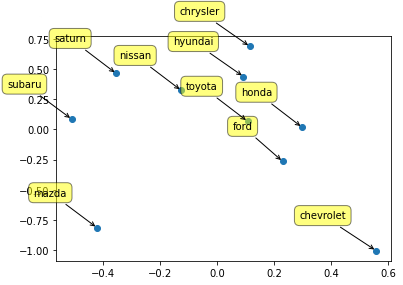

In [ ]:
import matplotlib.pyplot as plt
# Plotting MDS plot
from sklearn import manifold
seed = np.random.RandomState(seed=10)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(plot_dis)
coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(top_brands, coords[:, 0], coords[:, 1]):
    
    plt.annotate(
        label,
        xy = (x, y), xytext = (-30, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

# Task B:

Honda and Toyota were the brands that were co-mentioned with a lift value of more than 1 which is 3.662227 and they are closely distributed in the MDS plot. They are both categorized as non-luxurious brands and known as the competitors in the car market.

Honda is famous for its safety and reliability. In the 2020 Top Safety Picks, Honda won five top safety pickups and one top safety +, however, Toyota also got four safety pickups and Nissan got one top safety + and one safety pickups. As those brands are co-mentioned frequently, in order to keep customers and increase market share on non-luxurious brands, Honda should do more research on safety improvements to keep their advantage. 

Even though the majority of the people recognize Toyota to be mostly associated with Honda, the team was also able to observe a high association with Nissan, Chevrolet, Chrysler, etc. as well. Additionally, Honda is also associated with Hyundai and Nissan which has a high lift value that is more than 2. Therefore, it is significant to not only focus on Honda (Toyota) but also on the other brands that show high lift values as they are being co-mentioned as much as Toyota (Honda).


# Task C:

In [ ]:
word_freq_list[0:20] #engine #miles #price #looks #power #are the top five attributes we pick descending in this order

['car',
 'honda',
 'ford',
 'like',
 'would',
 'one',
 'think',
 'toyota',
 'get',
 'good',
 'new',
 'much',
 'even',
 'better',
 'well',
 'also',
 'years',
 'time',
 'see',
 'hyundai']

In [ ]:
top_brands= top_list[0][0:5] #change
top_brands

0      honda
1       ford
2     toyota
3    hyundai
4      mazda
Name: 0, dtype: object

In [ ]:
attri = ["engine", "miles", "price", "looks","power"]
attri

['engine', 'miles', 'price', 'looks', 'power']

In [ ]:
a = numpy.zeros(shape=(5,5))
df_counts = pd.DataFrame(a, columns = attri, index=top_brands)

for i in range (len(top_brands)):
  for j in range (len(attri)):
      for k in range(len(df['comments'])):
        if top_brands[i] in df['comments'][k] and attri[j] in df['comments'][k] :
          df_counts.iloc[i,j] += 1

df_counts

,engine,miles,price,looks,power
0,,,,,
honda,161.0,122.0,168.0,59.0,119.0
ford,195.0,89.0,106.0,52.0,116.0
toyota,79.0,44.0,68.0,23.0,57.0
hyundai,40.0,26.0,34.0,20.0,28.0
mazda,103.0,65.0,120.0,59.0,110.0


In [ ]:
df_lift = df_counts.copy()

In [ ]:
N = len(df["comments"])
for i in range (len(top_brands)):
  for j in range (len(top_brands)):
      df_lift.iloc[i,j] = N * (df_counts.iloc[i,j]) / (final_dict[df_counts.index[i]] * final_dict[df_counts.columns[j]] )

In [ ]:
df_lift #lift table for attributes and 

,engine,miles,price,looks,power
0,,,,,
honda,0.710796,0.612789,0.939370,0.434400,0.779349
ford,1.304341,0.677296,0.897989,0.580067,1.151013
toyota,0.731908,0.463783,0.797897,0.355366,0.783376
hyundai,0.595903,0.440678,0.641509,0.496894,0.618785
mazda,1.585176,1.138115,2.338999,1.514296,2.511301


Mazda had the highest associations with all 5 attributes

# Task D:

Assumption: all attributes counted implies positive sentiment

i) Product Manager


*   Honda: The lift value of ‘engine’ is less than 1 which means that it is not co-mentioned as much as other brands. It could be losing to Toyota on ‘engine’ and ‘power’. It should invest in improving its ‘engine’ and ‘power’ which customers care about and try to improve ‘looks’. Additionally, Honda should conduct more research on mpg improvement by learning from other manufacturers like Mazda or Ford which has a lift value more than 1. And honda is usually associated with non-luxurious brands, if the company has a lower budget, it could enhance the image of cost effectiveness to attract new customers.
*   Ford:  Ford is doing great on ‘engine’ and ‘power’ with lift values of more than 1. From a product manager’s perspective, the group could consider improvements on ‘miles’ which will result in a synergistic effect on having a high fuel efficiency on top of sufficient engine and power capacities.
*   Toyota: Toyota has low lift values associated with ‘looks’ and ‘miles’. A good appearance is easier to attract young people and improve sales. The group recommends that it should have a design team to make some changes in their new products according to the preference of customers. Also, improving the mileage of their products will lead to more co-mention in a more positive way.
*   Hyundai: In terms of product development, Hyundai can focus on attributes that are lower than 1, such as having better fuel efficiency and enhancing the power of the motor. The five attributes all have lower lift values. The group recommends that the product managers conduct research on the brand’s loyal customers to find out which characteristics attract these customers the most attention and first strengthen these characteristics.
*   Mazda: Mazda has a strong relationship with ‘power’ with a high lift value of 2.55. Mazda is known for its technical paranoia in the automotive industry. This is the strength of Mazda and it should continue to fully focus on ‘engine’ research and development which customers mention frequently.


ii) Marketing/advertising manager
*   Honda: with a lift value of 0.43 for the term ‘looks’ it seems people don’t seem to associate ‘looks’ with Honda. So, the group would recommend advertisements showing off Honda cars in a good light and appeal to the taste of the target audience.
*   Ford: with a lift value of 1.3 for the term ‘engine’, the group would recommend marketing the engine to potential customers as there is a positive association between the two and they should take advantage of this.
*   Toyota: has very low lift value associated with ‘looks’ and ‘miles’ so the group would recommend advertising more about the high mpg of Toyota cars as well as consider a redesign of some models that aren’t as successful with their target audience.
*   Hyundai: relative to how they are faring for the other terms, Hyundai is doing decently well with the term ‘price’ so the group recommends having the advertising team focus on the low price and good value associated with Hyundai. Hyundai could improve in most attributes so they should decide which they value the most in their brand and focus on that.
*   Mazda: with respect to the attributes above, Mazda is doing well for most attributes but the group would recommend investing in the image of their cars as the term ‘looks’ is relatively less associated with Mazda than other terms.



##Task E:

In [ ]:
#assume the sentiment is positive
#word_freq_list
#like
#good
#better
#best
#great
#nice
#top
#certainly
#fun
#interesting 
#are the top ten words we chose

In [ ]:
want = ["like", "good", "better", "best","great","nice","top","certainly","fun","interesting"]
want

['like',
 'good',
 'better',
 'best',
 'great',
 'nice',
 'top',
 'certainly',
 'fun',
 'interesting']

In [ ]:
top_brands= top_list[0][0:10] #change
top_brands

0        honda
1         ford
2       toyota
3      hyundai
4        mazda
5       nissan
6       saturn
7    chevrolet
8     chrysler
9       subaru
Name: 0, dtype: object

In [ ]:
a = numpy.zeros(shape=(10,10))
df_counts = pd.DataFrame(a, columns = want, index=top_brands)

for i in range (len(top_brands)):
  for j in range (len(want)):
      for k in range(len(df['comments'])):
        if top_brands[i] in df['comments'][k] and want[j] in df['comments'][k] :
          df_counts.iloc[i,j] += 1

df_counts

,like,good,better,best,great,nice,top,certainly,fun,interesting
0,,,,,,,,,,
honda,393.0,233.0,180.0,117.0,126.0,51.0,110.0,48.0,65.0,38.0
ford,294.0,192.0,167.0,81.0,81.0,57.0,96.0,52.0,64.0,31.0
toyota,154.0,94.0,83.0,62.0,42.0,16.0,44.0,24.0,16.0,17.0
hyundai,100.0,72.0,40.0,21.0,26.0,12.0,27.0,8.0,12.0,19.0
mazda,281.0,150.0,150.0,72.0,98.0,63.0,71.0,27.0,59.0,20.0
nissan,102.0,63.0,53.0,44.0,30.0,19.0,27.0,8.0,17.0,15.0
saturn,41.0,31.0,25.0,9.0,11.0,10.0,6.0,7.0,6.0,7.0
chevrolet,8.0,1.0,0.0,5.0,2.0,3.0,6.0,0.0,0.0,0.0
chrysler,45.0,28.0,23.0,13.0,17.0,4.0,11.0,2.0,6.0,5.0


In [ ]:
df_lift = df_counts.copy()

In [ ]:
N = len(df["comments"])
for i in range (len(top_brands)):
  for j in range (len(top_brands)):
      df_lift.iloc[i,j] = N * (df_counts.iloc[i,j]) / (final_dict[df_counts.index[i]] * final_dict[df_counts.columns[j]] )

In [ ]:
df_lift #lift table for want/love words

,like,good,better,best,great,nice,top,certainly,fun,interesting
0,,,,,,,,,,
honda,0.673209,0.612411,0.562985,0.696941,0.779947,0.493512,1.317107,0.665485,1.055490,0.709371
ford,0.763031,0.764584,0.791367,0.731026,0.759656,0.835679,1.741553,1.092290,1.574555,0.876776
toyota,0.553590,0.518472,0.544770,0.775019,0.545575,0.324906,1.105583,0.698263,0.545219,0.665962
hyundai,0.578035,0.638581,0.422164,0.422111,0.543081,0.391837,1.090909,0.374269,0.657534,1.196850
mazda,1.677973,1.374356,1.635448,1.495079,2.114667,2.125148,2.963519,1.304915,3.339749,1.301490
nissan,0.610095,0.578185,0.578815,0.915172,0.648419,0.641979,1.128838,0.387282,0.963894,0.977734
saturn,0.574114,0.666048,0.639177,0.438238,0.556601,0.791014,0.587268,0.793327,0.796432,1.068180
chevrolet,0.115146,0.022085,0.000000,0.250255,0.104023,0.243922,0.603646,0.000000,0.000000,0.000000
chrysler,0.697735,0.666140,0.651138,0.700930,0.952498,0.350355,1.192179,0.250985,0.881886,0.844851


In [ ]:
#calculate the average lift for each brand for "Want Score" (Ranked):
df_lift.mean(axis=1).sort_values(ascending = False)

0
mazda        1.933234
subaru       1.009975
ford         0.993052
honda        0.756646
nissan       0.743041
chrysler     0.718870
saturn       0.691040
hyundai      0.631537
toyota       0.627736
chevrolet    0.133908
dtype: float64

The team used the following ten aspirational terms which are “like”, “good”, “better”,  “best”, “great”, “nice”, “top”, “certainly”, “fun”, and “interesting”. The reason behind choosing these terms was that they inherently have more positive sentiments. Therefore, when people mention these terms, the team assumed that the customers would want to purchase cars from the brand. As a result, Mazda turned out to be the most aspirational brand based on our analysis because it had the highest average lift value of 1.933234. Additionally, the team was able to observe that Mazda outnumbered all the attributes which may indicate that our data could be biased. However, it is not since while Mazda appeared 605 times in the data, Hyundai appeared 625 times. This means that the word frequency for the brand is not a bias factor for calculating the lift values. 

Therefore, the team was able to extract that Mazda seems to have the most positive impression on “Midsized Sedans 2.0” based on our analysis. This implies that the team is able to suggest this analysis to Mazda’s marketing team to focus more on advertising or manufacturing sedans than other types of models.
